<a href="https://colab.research.google.com/github/thejasrao262003/Implementation-of-Convolutional-Neural-Network-from-scratch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Loading data and splitting data
## Part 2: Building Model
## Part 3: Training model
## Part 4: Plotting Graphs

In [ ]:
pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
import os

In [ ]:
os.chdir('/content/drive/MyDrive/AppleDataset')

splitfolders.ratio("/content/drive/MyDrive/AppleDataset", output="/content/Output", seed=1337, ratio=(.75, .1, .15))


Copying files: 124 files [00:41,  2.96 files/s]


In [ ]:
os.chdir('../../')

## Part 2: Building Model

In [ ]:
import tensorflow as tf

train_path = '/content/Output/train'
test_path = '/content/Output/test'
valid_path = '/content/Output/val'

train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=10)
valid_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224, 224), batch_size=1)
test_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=2, shuffle=False)


Found 90 images belonging to 4 classes.
Found 11 images belonging to 4 classes.
Found 23 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Input, GlobalMaxPooling2D, concatenate

input_shape = Input((224, 224, 3))
modelvgg = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(input_shape)
modelvgg = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(modelvgg)
modelvgg = MaxPooling2D(pool_size=(2,2), strides=(2,2))(modelvgg)

modelvgg = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(modelvgg)
modelvgg = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(modelvgg)
modelvgg = MaxPooling2D(pool_size=(2,2), strides=(2,2))(modelvgg)

modelvgg = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(modelvgg)
modelvgg = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(modelvgg)
modelvgg = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(modelvgg)
modelvgg = MaxPooling2D(pool_size=(2,2), strides=(2,2))(modelvgg)

modelvgg = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(modelvgg)
modelvgg = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(modelvgg)
modelvgg = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(modelvgg)
modelvgg = MaxPooling2D(pool_size=(2,2), strides=(2,2))(modelvgg)

modelvgg = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(modelvgg)
modelvgg = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(modelvgg)
modelvgg = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(modelvgg)
modelvgg = MaxPooling2D(pool_size=(2,2), strides=(2,2))(modelvgg)

modelvgg = Flatten()(modelvgg)
modelvgg = Dense(units=4096, activation='relu')(modelvgg)
modelvgg = Dense(units=4096, activation='relu')(modelvgg)
modelvgg = Dense(units=4, activation='softmax')(modelvgg)

In [ ]:
from tensorflow.keras import Model
model = Model(inputs=input_shape, outputs=modelvgg)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                             

## Part 3: Training Model

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model_fit = model.fit(train_batches, epochs=100, validation_data = valid_batches, batch_size=2, verbose=1)

Epoch 1/100
9/9 [==============================] - 23s 279ms/step - loss: 71758.5859 - accuracy: 0.2556 - val_loss: 1.3825 - val_accuracy: 0.2727
Epoch 2/100
9/9 [==============================] - 2s 184ms/step - loss: 1.4014 - accuracy: 0.1889 - val_loss: 1.3813 - val_accuracy: 0.2727
Epoch 3/100
9/9 [==============================] - 2s 182ms/step - loss: 1.3851 - accuracy: 0.2667 - val_loss: 1.3782 - val_accuracy: 0.2727
Epoch 4/100
9/9 [==============================] - 2s 190ms/step - loss: 1.3876 - accuracy: 0.2333 - val_loss: 1.3766 - val_accuracy: 0.2727
Epoch 5/100
9/9 [==============================] - 2s 187ms/step - loss: 1.3895 - accuracy: 0.2222 - val_loss: 1.3786 - val_accuracy: 0.2727
Epoch 6/100
9/9 [==============================] - 2s 183ms/step - loss: 1.3851 - accuracy: 0.2444 - val_loss: 1.3762 - val_accuracy: 0.1818
Epoch 7/100
9/9 [==============================] - 2s 183ms/step - loss: 1.3837 - accuracy: 0.2111 - val_loss: 1.3367 - val_accuracy: 0.1818
Epoch 8/

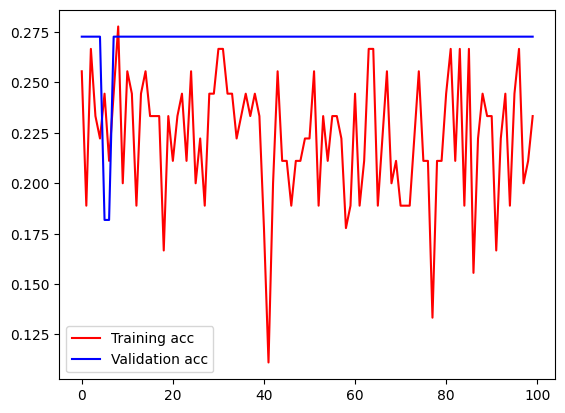

In [ ]:
import matplotlib.pyplot as plt

#overfitting after epoch 9
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
loss= model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label= "Training acc")
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()

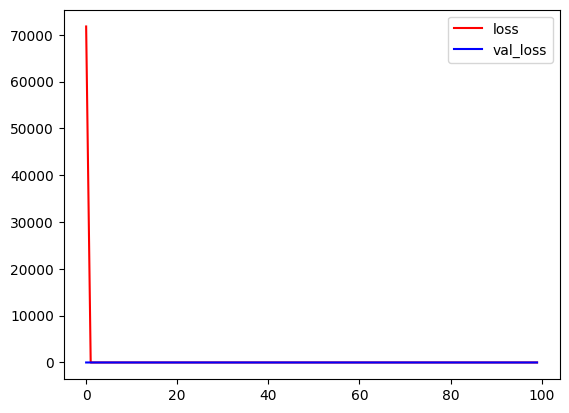

In [ ]:
epochs = range(len(acc))
plt.plot(epochs, loss, 'r', label= 'loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.legend()